In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

def get_temporal_weights(n_points):
    weights = np.zeros(n_points)
    for i in range(n_points):
        weights[i] = (1.0/(i+1))

    weights = weights/np.sum(weights)
    
    return weights

In [39]:
areas = ['Amran', 'Al Mahwit', "Al Dhale'e", 'Hajjah', "Sana'a", 'Dhamar', 'Abyan', 'Al Hudaydah', 'Al Bayda', 'Amanat Al Asimah', 'Al Jawf', 'Raymah', 'Lahj', 'Aden', 'Ibb', 'Taizz', 'Marib', "Sa'ada", 'Al Maharah', 'Shabwah', 'Moklla', "Say'on"]
df = pd.read_csv('Outbreak.csv',sep=',')

#removing comma which separates thousands
for j in range(len(df)):
    df.set_value(j,'Cases',np.float(df['Cases'][j].replace(',','')))
    
yemen_regions = pd.read_csv('Yemen_original.csv',sep=',')
    
print("Number of areas: "+str(len(areas)))
df.head()

Number of areas: 22


,Date,Governorate,Cases,Deaths,CFR (%),Attack Rate (per 1000),COD Gov English,COD Gov Arabic,COD Gov Pcode
0,2018-01-14,Amran,102231,175,0.17,88.088,Amran,عمران,29.0
1,2018-01-14,Al Mahwit,61097,149,0.24,83.671,Al Mahwit,المحويت,27.0
2,2018-01-14,Al Dhale'e,47132,81,0.17,64.432,Al Dhale'e,الضالع,30.0
3,2018-01-14,Hajjah,118468,420,0.35,50.850,Hajjah,حجة,17.0
4,2018-01-14,Sana'a,74103,123,0.17,50.398,Sana'a,صنعاء,23.0


In [40]:
yemen_regions.head()

,region,Latitude,longitude,population/million,area/km^2
0,Amran,16.15,43.92,1123651,9587
1,Al Mahwit,15.38,43.57,732360,2858
2,Al Dhale'e,13.83,44.74,602613,4786
3,Hajjah,16.09,43.25,1887213,10141
4,Sana'a,15.35,44.32,2279665,15052


In [50]:
# extracting features
recent_cases = np.empty(len(areas),dtype=np.int)
historic_cases = np.empty(len(areas),dtype=np.float64)
death_rate_weighted = np.empty(len(areas),dtype=np.float64)
population_density = np.empty(len(areas),dtype=np.float64)
for i,area in enumerate (areas):
    data = df[df['Governorate']==area]['Cases'].values
    recent_cases[i] = data[0]-data[1]
    
    data = df[df['Governorate']==area]['Cases']
    weights = get_temporal_weights(len(data))
    historic_cases[i] = np.dot(data,weights)
    
    data = df[df['Governorate']==area]['CFR (%)']
    weights = get_temporal_weights(len(data))
    death_rate_weighted[i] = np.dot(data,weights)
    
    population = yemen_regions[yemen_regions['region']==area]['population/million']
    area_size = yemen_regions[yemen_regions['region']==area]['area/km^2']
    population_density[i] = population/area_size
    
#normalisation
normalise = lambda x : x/np.sum(x)
recent_cases = normalise(recent_cases)
historic_cases = normalise(historic_cases)
death_rate_weighted = normalise(death_rate_weighted)
population_density = normalise(population_density)

In [57]:
ratio_past_recent = 0.2
past = (historic_cases + death_rate_weighted + population_density)/3

score = ratio_past_recent*past + (1-ratio_past_recent)*recent_cases
score

array([0.06856677, 0.04811252, 0.00708879, 0.12429693, 0.12060869,
       0.13119036, 0.00398939, 0.10034913, 0.041171  , 0.11693562,
       0.00391202, 0.0765761 , 0.00427984, 0.01322109, 0.06842535,
       0.05518094, 0.00198942, 0.00212306, 0.00116882, 0.00263563,
       0.00744604, 0.00073251])

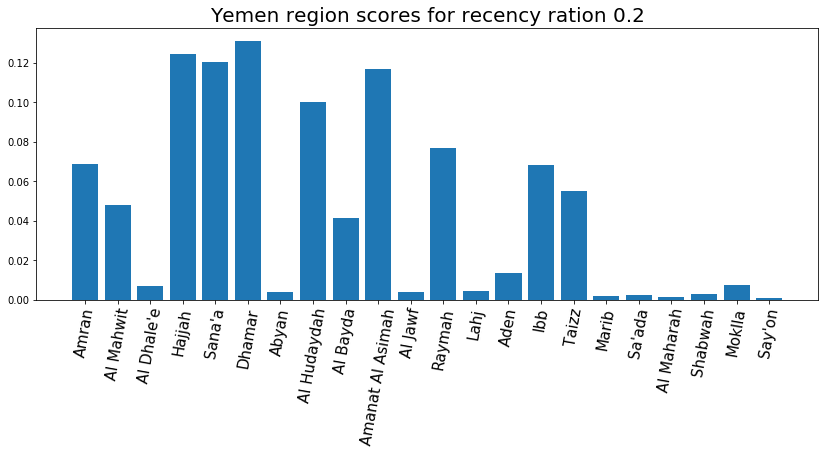

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(14,5)
ax.bar(range(len(areas)),score)
ax.set_title('Yemen region scores for recency ration '+str(ratio_past_recent), size=20)
ax.set_xticks(range(len(areas)))
ax.set_xticklabels(areas, rotation=80, size=15);

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(14,5)
ax.bar(range(len(areas)),score)
ax.bar(range(len(areas)),)
ax.set_title('Yemen region scores for recency ration '+str(ratio_past_recent), size=20)
ax.set_xticks(range(len(areas)))
ax.set_xticklabels(areas, rotation=80, size=15);